In [88]:
import pickle
with open("train_data.txt", "rb") as myFile:
    data = pickle.load(myFile)

In [89]:
data=data[1:]

In [90]:
x_values=[w[0] for w in data[1:]]
y_values=[w[1] for w in data[1:]]
z_values=[w[2] for w in data[1:]]

In [91]:
%matplotlib inline
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random

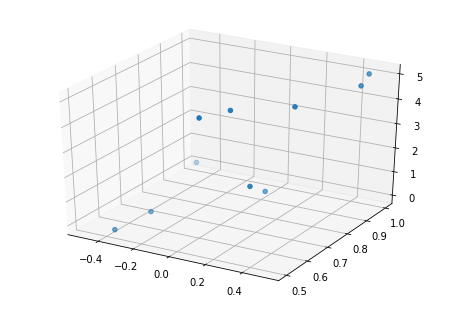

In [92]:
fig = pyplot.figure()
ax = Axes3D(fig)

ax.scatter(x_values, y_values,z_values)

In [93]:
%matplotlib inline

data

[(0.269, 0.532, 2.0),
 (0.32944444444444443, 0.5577777777777778, 2.5),
 (0.1, 0.525, 5),
 (0.16904761904761909, 0.6053571428571428, 5),
 (-0.3277777777777778, 0.6444444444444445, 0.0),
 (0.1802083333333333, 0.7604166666666666, 1.0),
 (-0.35, 0.5, 0.0),
 (0.46875, 1.0, 5),
 (0.52, 0.9099999999999999, 5),
 (0.4, 0.7, 5),
 (-0.5, 1.0, 0.0)]

In [94]:
import math
def distance(n,p1,p2):
    sum=0
    for i in range(n):
        sum+=math.pow(p1[i]-p2[i],2)
    return math.sqrt(sum)
def centroid(cluster):
    import operator
    
    sum=(0,0,0)
    for i in range(len(cluster)):
        sum=tuple(map(operator.add, sum, data[cluster[i]-1]))
    sum=list(sum)
    for i in range(len(sum)):
        sum[i]/=len(cluster)
    
    return tuple(sum)

In [104]:
k=3
from random import randint
c=[]
c_new=[]
clusters=[]
for i in range(k):
    c.append(None)
    c_new.append(None)
    c[i]=data[randint(0, len(data)-1)]
    clusters.append([])
print(c)
iteration=1
while(True):
    print("\n",iteration,":")
    for i in range(len(data)):
        pos=None
        min_dist=9999
        for j in range(k):
            dist=distance(3,c[j],data[i])
            if dist<min_dist:
                min_dist=dist
                pos=j
        clusters[pos].append(i+1)
    flag=0
    for i in range(k):
        c_new[i]=centroid(clusters[i])
        print(c_new[i],c[i])
        if( all(j == k for j, k in zip(c_new[i],c[i])))== False:
            flag=1
    print (clusters)
    if flag==0:
        break
    else:
        for i in range(k):
            clusters[i]=[]
            c[i]=c_new[i]
    
    iteration+=1
    if iteration==10:
        break
    

[(0.4, 0.7, 5), (0.1802083333333333, 0.7604166666666666, 1.0), (0.46875, 1.0, 5)]

 1 :
(0.22301587301587303, 0.6101190476190476, 5.0) (0.4, 0.7, 5)
(-0.06652083333333333, 0.6657731481481481, 0.9166666666666666) (0.1802083333333333, 0.7604166666666666, 1.0)
(0.494375, 0.955, 5.0) (0.46875, 1.0, 5)
[[3, 4, 10], [1, 2, 5, 6, 7, 11], [8, 9]]

 2 :
(0.22301587301587303, 0.6101190476190476, 5.0) (0.22301587301587303, 0.6101190476190476, 5.0)
(-0.06652083333333333, 0.6657731481481481, 0.9166666666666666) (-0.06652083333333333, 0.6657731481481481, 0.9166666666666666)
(0.494375, 0.955, 5.0) (0.494375, 0.955, 5.0)
[[3, 4, 10], [1, 2, 5, 6, 7, 11], [8, 9]]


3 0.1 0.525 5 #0000FF
4 0.16904761904761909 0.6053571428571428 5 #0000FF
10 0.4 0.7 5 #0000FF
1 0.269 0.532 2.0 #00FF00
2 0.32944444444444443 0.5577777777777778 2.5 #00FF00
5 -0.3277777777777778 0.6444444444444445 0.0 #00FF00
6 0.1802083333333333 0.7604166666666666 1.0 #00FF00
7 -0.35 0.5 0.0 #00FF00
11 -0.5 1.0 0.0 #00FF00
8 0.46875 1.0 5 #FF0066
9 0.52 0.9099999999999999 5 #FF0066


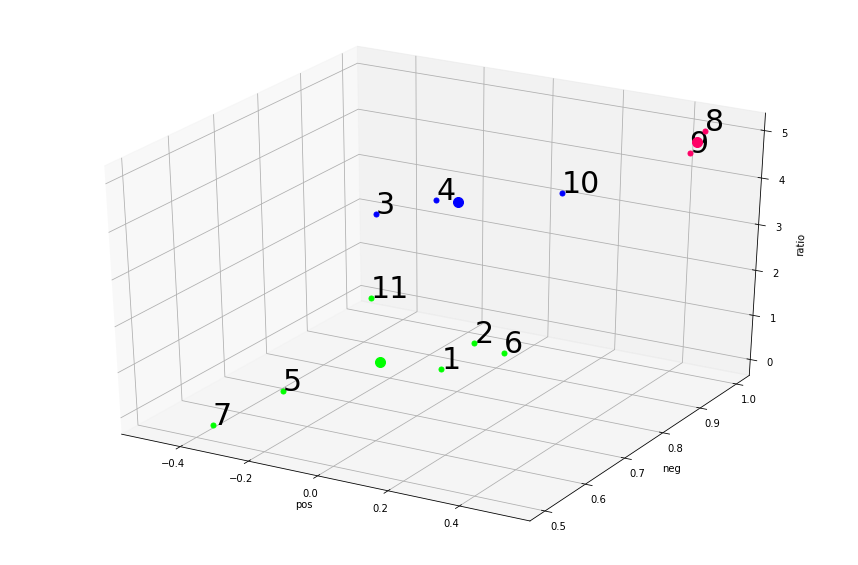

In [105]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import random
colors=["#0000FF", "#00FF00", "#FF0066"]
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

for i in range(k):
    #colors.append("%03x" % random.randint(0, 0xFFF))
    ax.scatter(c[i][0],c[i][1],c[i][2],color=colors[i],s=100)
    for j in clusters[i]:
        print(j,data[j-1][0],data[j-1][1],data[j-1][2],colors[i])
        
        ax.scatter(data[j-1][0],data[j-1][1],data[j-1][2],color=colors[i],s=25)
        ax.text(data[j-1][0],data[j-1][1],data[j-1][2],  '%s' % (str(j)), size=30, zorder=1)
ax.set_xlabel('pos')
ax.set_ylabel('neg')
ax.set_zlabel('ratio')
plt.show()
